In [1]:
import pandas as pd
df=pd.read_csv('data/clean_data.csv')
df.head()


,Job_id,Job Title,Rating,Company_id,Company Name,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,Min_Salary,Max_Salary,Avg_Salary,State_id,City,State,Headquarter
0,0,Business Analyst - Clinical & Logistics Platform,3.9,0,Memorial Sloan-Kettering,10000+ employees,1884.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,3.500000e+09,0.0,56000.0,102000.0,79000.0,0,New York,NY,NY
1,2,Data Analyst,3.6,2,Asembia,501 to 1000 employees,2004.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,7.500000e+06,0.0,56000.0,102000.0,79000.0,2,Florham Park,NJ,NJ
2,3,"Information Security Analyst, Incident Response",3.6,3,BD,10000+ employees,1897.0,Company - Public,Health Care Products Manufacturing,Manufacturing,1.000000e+10,0.0,56000.0,102000.0,79000.0,3,Franklin Lakes,NJ,NJ
3,4,Analyst - FP&A Global Revenue,3.4,4,Rubicon Project,201 to 500 employees,2007.0,Company - Public,Internet,Information Technology,3.000000e+08,1.0,56000.0,102000.0,79000.0,4,New York,NY,CA
4,6,Investment Analyst - Graduate,3.8,6,Swiss Re,10000+ employees,1863.0,Company - Public,Insurance Agencies & Brokerages,Insurance,1.000000e+10,0.0,56000.0,102000.0,79000.0,6,New York,NY,Switzerland


In [2]:
#Dependent and Independent Variables
df_=df.loc[:,['Avg_Salary','Rating']]
df_.head(5)

,Avg_Salary,Rating
0,79000.0,3.9
1,79000.0,3.6
2,79000.0,3.6
3,79000.0,3.4
4,79000.0,3.8


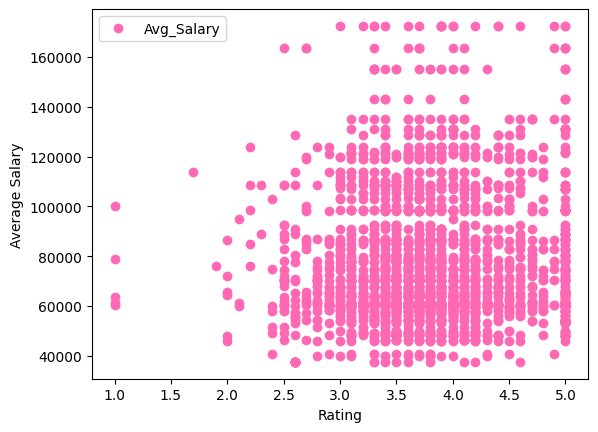

In [3]:
#Visualize the change in the variables 
import matplotlib.pyplot as plt
df.plot(x='Rating', y='Avg_Salary', style='o', color='#FF69B4')
plt.xlabel('Rating')
plt.ylabel('Average Salary')
plt.show()

In [4]:
#Put the data into independent and dependent variables 

x=pd.DataFrame(df['Rating'])
y=pd.DataFrame(df['Avg_Salary'])

In [5]:
#Training and testing data sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest, = train_test_split(x,y,test_size=0.2,random_state=1)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(2052, 1)
(513, 1)
(2052, 1)
(513, 1)


In [6]:
#Training the algo
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)
print(regressor.intercept_)

[66784.37199406]


In [7]:
from sklearn.linear_model import LinearRegression
a=pd.DataFrame(regressor.coef_, index =['Rating']).transpose()
b=pd.DataFrame(x.columns,columns= ['Avg_Salary'])
coef_df=pd.concat([a,b], axis=1, join ='inner')
print(coef_df)


        Rating Avg_Salary
0  2777.400381     Rating


In [8]:
#Predicting
ypred=regressor.predict(xtest)
ypred=pd.DataFrame(ypred, columns=['Predicted'])
ypred

,Predicted
0,79282.673709
1,78449.453594
2,76783.013366
3,76783.013366
4,77338.493442
...,...
508,77060.753404
509,77893.973518
510,77060.753404
511,76783.013366


In [9]:
print(ytest)

      Avg_Salary
893      75000.0
586      86000.0
705      70500.0
2495     62500.0
366      63000.0
...          ...
432      79500.0
2373     60500.0
335      71000.0
925      70000.0
1955     60000.0

[513 rows x 1 columns]


In [10]:
#Evaluating the algo
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest,ypred))
print('Mean Squared Error:',metrics.mean_squared_error(ytest,ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest,ypred)))

Mean Absolute Error: 20555.43389927787
Mean Squared Error: 662329286.3325212
Root Mean Squared Error: 25735.75890337258


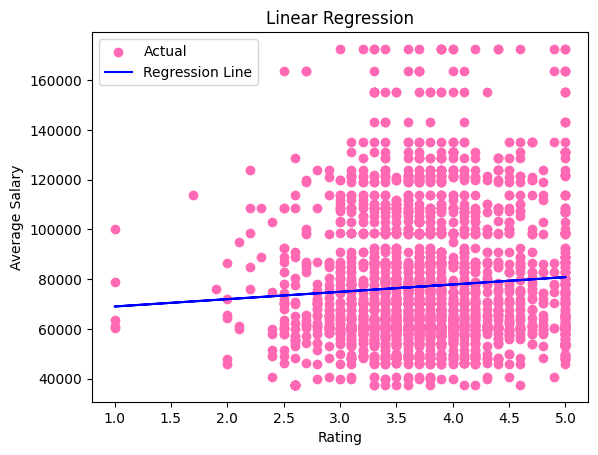

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = df['Rating'].values.reshape(-1, 1)
y = df['Avg_Salary'].values

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Predict using the model
y_pred = model.predict(x)

# Plot the data points and the regression line
plt.scatter(x, y, color='#FF69B4', label='Actual')
plt.plot(x, y_pred, color='blue', label='Regression Line')
plt.xlabel('Rating')
plt.ylabel('Average Salary')
plt.title('Linear Regression')
plt.legend()
plt.show()

